# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate the Cities List by Using the `citipy` Library

In [33]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

582

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [37]:
from pprint import pprint

In [38]:
#SET UP URL
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"
query_url = base_url + "&appid=" + weather_api_key + "&q="

city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

record = 1

print(f'Beginning Data Retrieval')
print(f'-----------------------------')

for city in cities:
    try:
        response = requests.get(f'{query_url}{city}').json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        print(f'Processing Record {record} | {city}')
        record = record + 1
    except KeyError:
        print(f'City not found. Skipping...')
    time.sleep(1)

Beginning Data Retrieval
-----------------------------
Processing Record 1 | isafjordur
Processing Record 2 | najaf
Processing Record 3 | saint-pierre
Processing Record 4 | sao joao da barra
Processing Record 5 | adrar
Processing Record 6 | choma
Processing Record 7 | klyuchi
Processing Record 8 | albany
Processing Record 9 | chibougamau
Processing Record 10 | grytviken
Processing Record 11 | san patricio
Processing Record 12 | port-aux-francais
Processing Record 13 | argo
Processing Record 14 | kodiak
Processing Record 15 | zabid
Processing Record 16 | talnakh
Processing Record 17 | carutapera
Processing Record 18 | wailua homesteads
Processing Record 19 | port augusta
City not found. Skipping...
Processing Record 20 | nuku'alofa
Processing Record 21 | ust'-barguzin
Processing Record 22 | keflavik
Processing Record 23 | tripoli
Processing Record 24 | georgetown
Processing Record 25 | west island
Processing Record 26 | northam
Processing Record 27 | port elizabeth
Processing Record 28 

Processing Record 235 | zheshart
Processing Record 236 | malango
Processing Record 237 | aasiaat
Processing Record 238 | huarmey
Processing Record 239 | copiapo
Processing Record 240 | dryden
Processing Record 241 | atafu village
Processing Record 242 | port douglas
Processing Record 243 | menaka
Processing Record 244 | jamestown
City not found. Skipping...
Processing Record 245 | trujillo
Processing Record 246 | lihue
Processing Record 247 | silale
Processing Record 248 | kayangel
City not found. Skipping...
Processing Record 249 | tazovsky
Processing Record 250 | kedrovyy
Processing Record 251 | nogliki
Processing Record 252 | sittwe
Processing Record 253 | forster
Processing Record 254 | belen
Processing Record 255 | witu
Processing Record 256 | jalalaqsi
Processing Record 257 | waqqas
Processing Record 258 | acarau
Processing Record 259 | zhanaozen
Processing Record 260 | vorkuta
City not found. Skipping...
Processing Record 261 | kingston
Processing Record 262 | tsiombe
Processing

Processing Record 473 | dhidhdhoo
Processing Record 474 | laayoune
Processing Record 475 | yallahs
Processing Record 476 | oumache
Processing Record 477 | sumbe
Processing Record 478 | shiraz
Processing Record 479 | ta`u
Processing Record 480 | bolobo
Processing Record 481 | natchez
Processing Record 482 | west freehold
Processing Record 483 | damghan
Processing Record 484 | shagonar
Processing Record 485 | ciudad bolivar
Processing Record 486 | laojunmiao
Processing Record 487 | zvezdnyy
Processing Record 488 | brookings
Processing Record 489 | santa cruz
Processing Record 490 | conduaga
City not found. Skipping...
Processing Record 491 | auki
Processing Record 492 | nouadhibou
Processing Record 493 | hammerfest
Processing Record 494 | port hedland
Processing Record 495 | baissa
Processing Record 496 | ketchikan
Processing Record 497 | ljusdal
Processing Record 498 | axim
Processing Record 499 | narvik
Processing Record 500 | remire-montjoly
Processing Record 501 | canutama
Processing

In [39]:
raw_data_df= pd.DataFrame(
                            {
                                "City":city_name,
                                "Lat":lat,
                                "Lng":lng,
                                "Max Temp":max_temp,
                                "Humidity":humidity,
                                "Cloudiness":cloudiness,
                                "Wind Speed":wind_speed,
                                "Country":country,
                                "Date":date
                            }
                         )

raw_data_df.Date = raw_data_df.Date.map(lambda x: '{:.0f}'.format(x))
raw_data_df.Cloudiness = raw_data_df.Cloudiness.map(lambda x: '{:.0f}'.format(x))
raw_data_df.Humidity = raw_data_df.Humidity.map(lambda x: '{:.0f}'.format(x))

raw_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Isafjordur,66.0755,-23.1240,39.96,74,100,4.45,IS,1685082276
1,Najaf,31.9985,44.3398,85.78,32,91,5.01,IQ,1685082277
2,Saint-Pierre,-21.3393,55.4781,76.68,65,0,16.11,RE,1685082142
3,São João da Barra,-21.6403,-41.0511,70.70,86,4,3.91,BR,1685082279
4,Adrar,20.5022,-10.0711,73.89,58,100,9.06,MR,1685082280
5,Choma,-16.8065,26.9531,64.89,44,1,5.23,ZM,1685082281
6,Klyuchi,52.2667,79.1667,65.55,26,17,14.88,RU,1685081692
7,Albany,42.6001,-73.9662,45.45,80,3,3.98,US,1685082206
8,Chibougamau,49.9168,-74.3659,35.22,87,0,4.61,CA,1685082285
9,Grytviken,-54.2811,-36.5092,36.34,83,77,7.65,GS,1685082286


In [40]:
raw_data_df.describe()

,Lat,Lng,Max Temp,Wind Speed
count,579.000000,579.000000,579.000000,579.000000
mean,19.671577,14.615502,66.234542,8.539637
std,32.926562,87.982872,14.782430,5.454584
min,-54.800000,-178.166700,27.340000,0.000000
25%,-8.109500,-63.358200,55.290000,4.610000
50%,22.916700,17.427200,68.160000,7.470000
75%,47.737450,88.640250,77.375000,11.655000
max,78.218600,177.483300,105.940000,40.380000


In [41]:
# Display sample data
raw_data_df.to_csv("city_data.csv")
raw_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [43]:
#  Get the indices of cities that have humidity over 100%.

In [45]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
raw_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Isafjordur,66.0755,-23.1240,39.96,74,100,4.45,IS,1685082276
1,Najaf,31.9985,44.3398,85.78,32,91,5.01,IQ,1685082277
2,Saint-Pierre,-21.3393,55.4781,76.68,65,0,16.11,RE,1685082142
3,São João da Barra,-21.6403,-41.0511,70.70,86,4,3.91,BR,1685082279
4,Adrar,20.5022,-10.0711,73.89,58,100,9.06,MR,1685082280
...,...,...,...,...,...,...,...,...,...
574,Mejit,10.2753,170.8646,81.84,80,100,15.05,MH,1685083014
575,Puerto Santa,-8.9906,-78.6456,70.99,86,100,11.70,PE,1685083015
576,Fortaleza,-3.7227,-38.5247,78.93,89,75,4.61,BR,1685082827
577,Xigazê,29.2500,88.8833,67.91,13,100,18.34,CN,1685083017


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

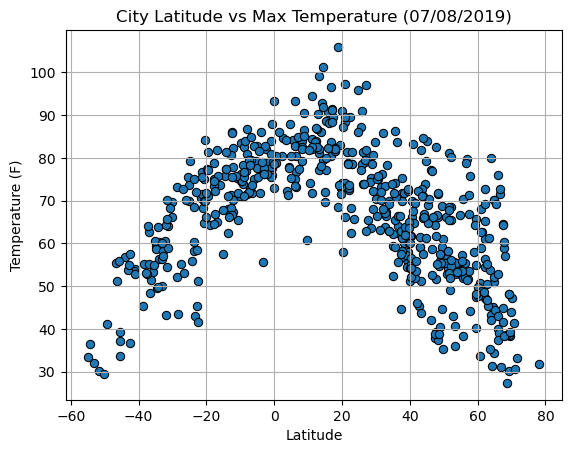

In [46]:
plt.scatter(raw_data_df["Lat"], raw_data_df["Max Temp"], edgecolor="black", linewidth = .75)
plt.title("City Latitude vs Max Temperature (07/08/2019)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()

plt.show()


#### Latitude Vs. Humidity

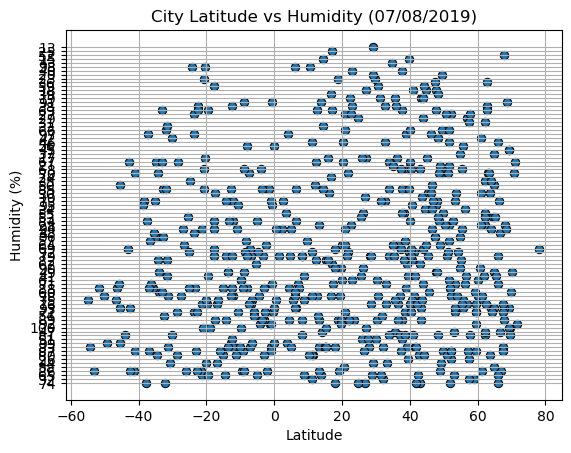

In [47]:
plt.scatter(raw_data_df["Lat"], raw_data_df["Humidity"], edgecolor="black", linewidth = .75)
plt.title("City Latitude vs Humidity (07/08/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

plt.savefig("LatitudeHumidity.png")
plt.show()

#### Latitude Vs. Cloudiness

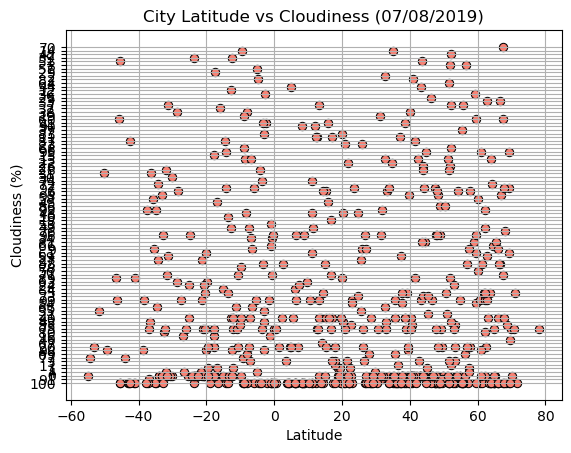

In [48]:
plt.scatter(raw_data_df["Lat"], raw_data_df["Cloudiness"], edgecolor="black", linewidth = .75, color="salmon")
plt.title("City Latitude vs Cloudiness (07/08/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

plt.savefig("LatitudeCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

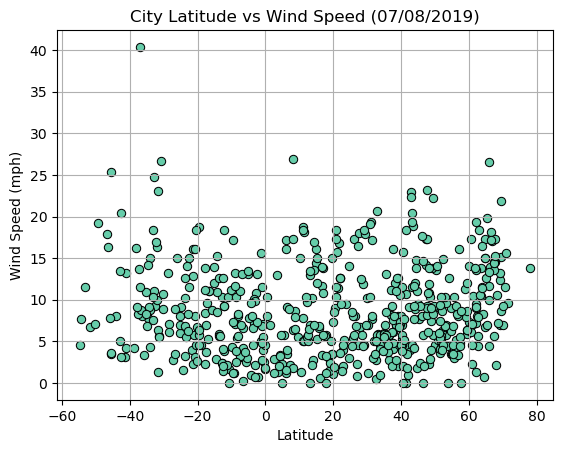

In [49]:
plt.scatter(raw_data_df["Lat"], raw_data_df["Wind Speed"], edgecolor="black", linewidth = .75, color="mediumaquamarine")
plt.title("City Latitude vs Wind Speed (07/08/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

plt.savefig("LatitudeWind.png")
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [50]:
# Create Northern and Southern Hemisphere DataFrames
north = raw_data_df.loc[raw_data_df['Lat'] >= 0]
south = raw_data_df.loc[raw_data_df['Lat'] < 0]

The r-squared is: -0.743


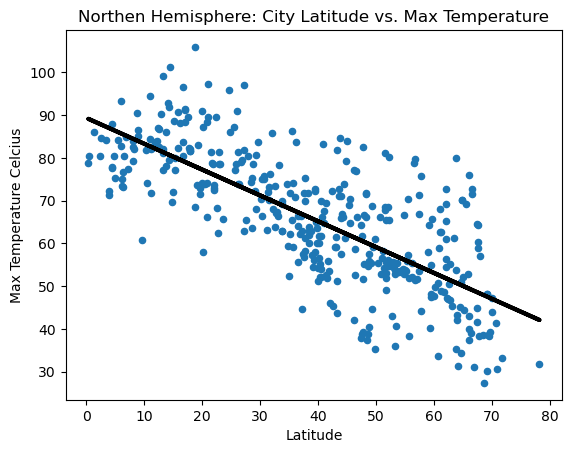

In [51]:
linear_regression = linregress(north['Lat'], north['Max Temp'])
linear_equation = linear_regression[0] * north['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
north.plot.scatter(
    x = 'Lat',
    y = 'Max Temp',)

plt.plot(
    north['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Northen Hemisphere: City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature Celcius')
plt.show()

###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.821


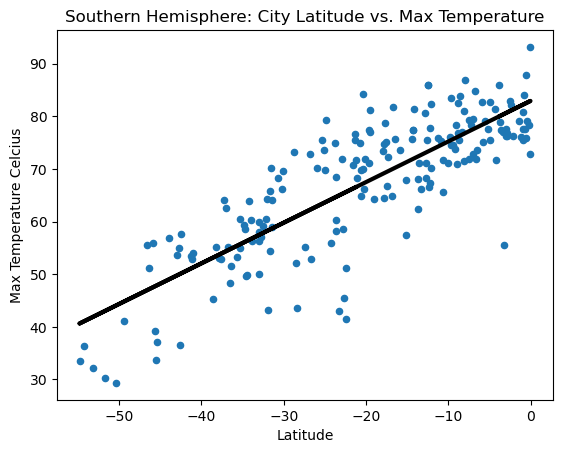

In [53]:
linear_regression = linregress(south['Lat'], south['Max Temp'])
linear_equation = linear_regression[0] * south['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
south.plot.scatter(
    x = 'Lat',
    y = 'Max Temp',)
    

plt.plot(
    south['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Southern Hemisphere: City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature Celcius')
plt.show()

The r-squared is: -0.097


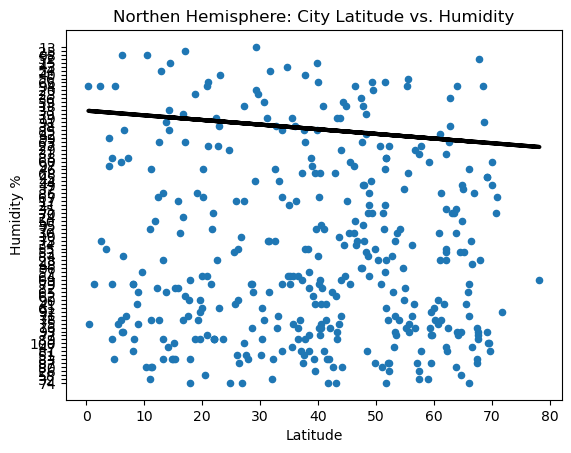

In [54]:
linear_regression = linregress(north["Lat"], north["Humidity"].astype('float'))
linear_equation = linear_regression[0] * north['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
north.plot.scatter(
    x = 'Lat',
    y = 'Humidity',)

plt.plot(
    north['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Northen Hemisphere: City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.052


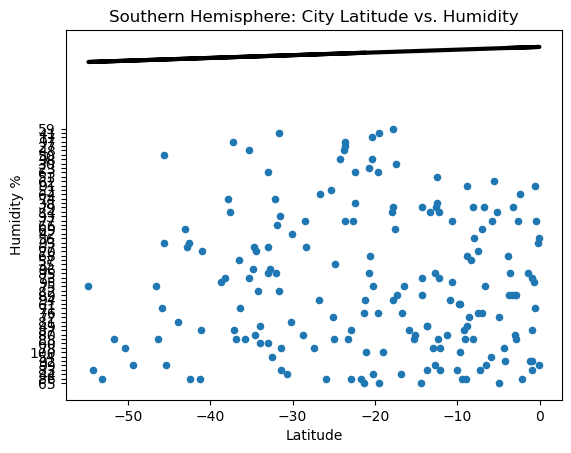

In [56]:
linear_regression = linregress(south['Lat'], south['Humidity'].astype('float'))
linear_equation = linear_regression[0] * south['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
south.plot.scatter(
    x = 'Lat',
    y = 'Humidity',)

plt.plot(
    south['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Southern Hemisphere: City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()

The r-squared is: 0.052


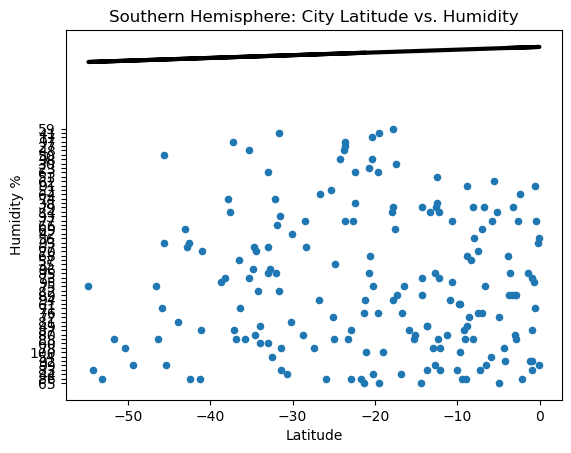

In [57]:
linear_regression = linregress(south['Lat'], south['Humidity'].astype('float'))
linear_equation = linear_regression[0] * south['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
south.plot.scatter(
    x = 'Lat',
    y = 'Humidity',)

plt.plot(
    south['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Southern Hemisphere: City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.016


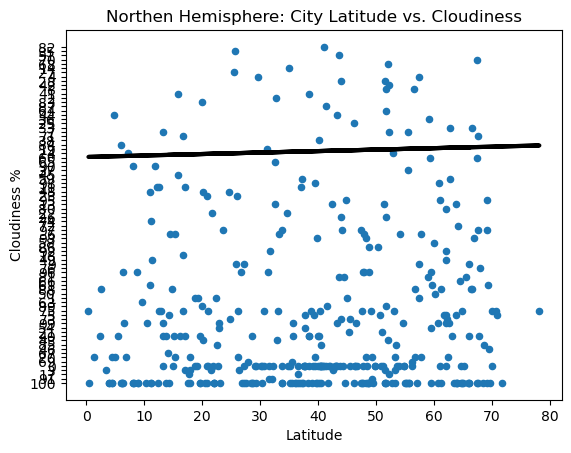

In [58]:
linear_regression = linregress(north['Lat'], north['Cloudiness'].astype('float'))
linear_equation = linear_regression[0] * north['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
north.plot.scatter(
    x = 'Lat',
    y = 'Cloudiness',)

plt.plot(
    north['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Northen Hemisphere: City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()

The r-squared is: -0.011


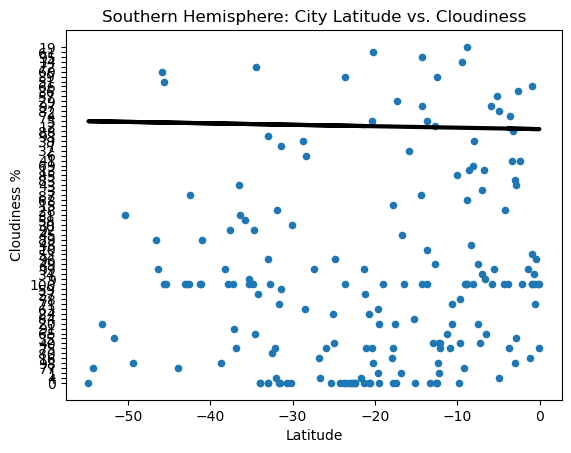

In [59]:
linear_regression = linregress(south['Lat'], south['Cloudiness'].astype('float'))
linear_equation = linear_regression[0] * south['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
south.plot.scatter(
    x = 'Lat',
    y = 'Cloudiness',)

plt.plot(
    south['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Southern Hemisphere: City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.166


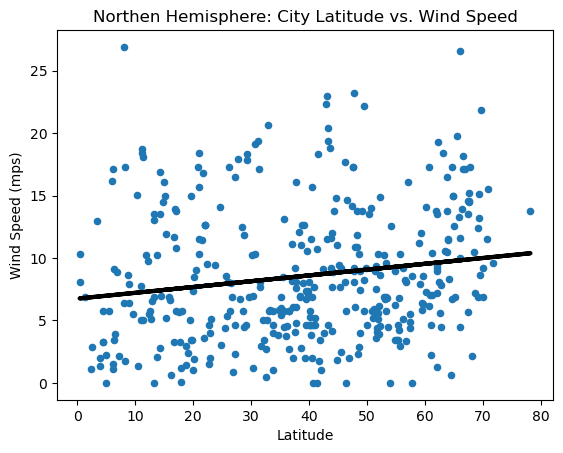

In [60]:
linear_regression = linregress(north['Lat'], north['Wind Speed'].astype('float'))
linear_equation = linear_regression[0] * north['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
north.plot.scatter(
    x = 'Lat',
    y = 'Wind Speed',)
plt.plot(
    north['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')
plt.title('Northen Hemisphere: City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mps)')
plt.show()

The r-squared is: -0.292


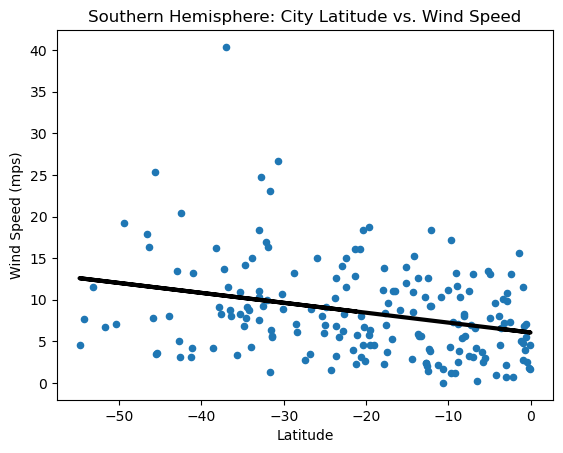

In [61]:
linear_regression = linregress(south['Lat'], south['Wind Speed'].astype('float'))
linear_equation = linear_regression[0] * south['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
south.plot.scatter(
    x = 'Lat',
    y = 'Wind Speed',)
plt.plot(
    south['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')
plt.title('Southern Hemisphere: City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mps)')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE